
# 🚗📊 Automobile Sales Analysis During Recession Periods

## 💼 Business Context

Understanding automobile sales trends and how they react to macroeconomic factors (e.g., GDP, unemployment, consumer confidence) is crucial for strategic planning. This analysis will help us understand:

- Historical sales trends
- Impact of recessions on sales
- Relationships with economic indicators
- Recommendations for pricing, marketing, and inventory strategy

---


## 🎯 Objectives

- Explore overall and vehicle-type-specific sales trends.
- Compare sales in recession vs. non-recession periods.
- Analyze the relationship between sales and economic indicators.
- Forecast future sales.
- Provide data-driven business recommendations.

---



## 🗂️ Data Loading & Cleaning

Let's load the dataset, check for missing values, and clean the data as needed.

In [7]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [9]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


# Data Description

recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

## 🔍 Exploratory Data Analysis (EDA)

### 📈 Overall Sales Trends


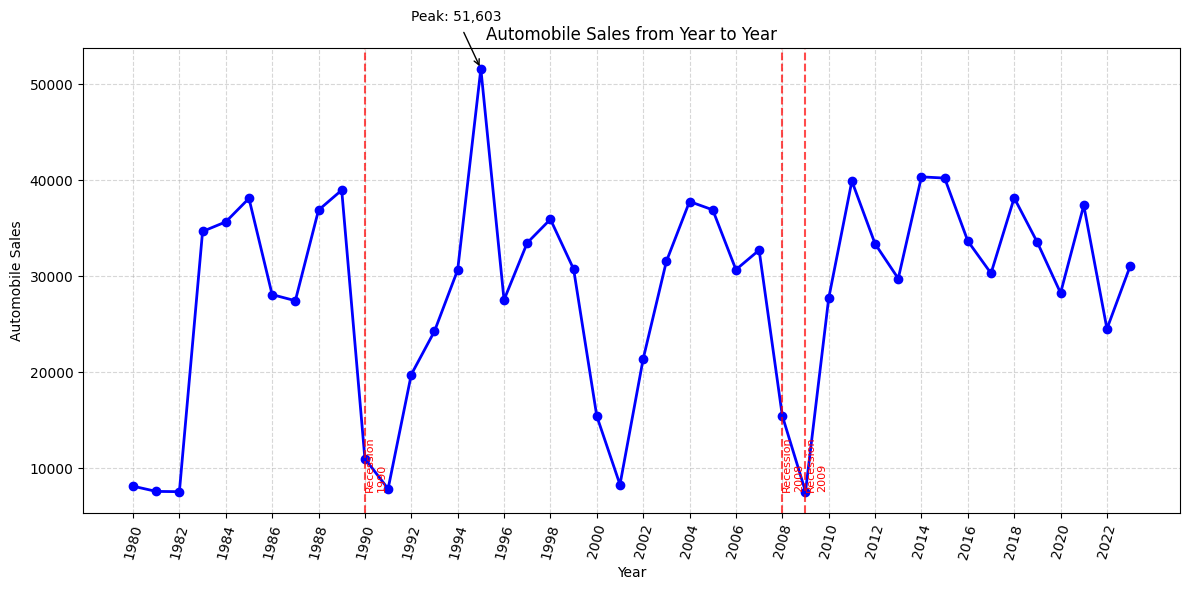

In [47]:
# Group and sum
yearly_sales = data.groupby("Year")["Automobile_Sales"].sum().reset_index()

# Identify peak
peak_year = yearly_sales.loc[yearly_sales["Automobile_Sales"].idxmax(), "Year"]
peak_value = yearly_sales["Automobile_Sales"].max()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales["Year"], yearly_sales["Automobile_Sales"], 
         marker='o', color='blue', linewidth=2)

plt.xticks(list(range(1980, 2024, 2)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales from Year to Year")
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate peak
plt.annotate(f'Peak: {peak_value:,.0f}', 
             xy=(peak_year, peak_value),
             xytext=(peak_year-3, peak_value + 5000), 
             arrowprops=dict(arrowstyle="->", color='black'),
             fontsize=10, backgroundcolor="white")

# Recession years
recession_years = [1990, 2008, 2009]
for year in recession_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year, yearly_sales["Automobile_Sales"].min(), 
             f'Recession\n{year}', rotation=90,
             verticalalignment='bottom', color='red', fontsize=8)

plt.tight_layout()
plt.show()


### 🚗 Sales by Vehicle Type

/var/folders/tv/65fm8gl968v8bvb1dnkdxjsw0000gn/T/ipykernel_48784/459558894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle_Type", y="Automobile_Sales", data=vehicle_sales, palette="Blues_r")


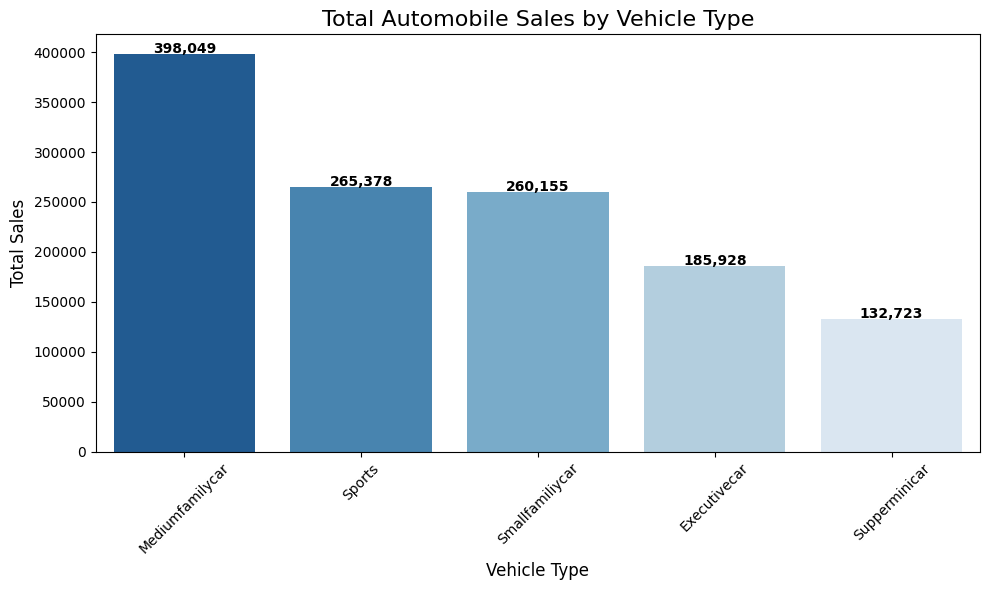

In [55]:
# Group and sort
vehicle_sales = data.groupby("Vehicle_Type")["Automobile_Sales"].sum().reset_index()
vehicle_sales = vehicle_sales.sort_values(by="Automobile_Sales", ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Vehicle_Type", y="Automobile_Sales", data=vehicle_sales, palette="Blues_r")

plt.title("Total Automobile Sales by Vehicle Type", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Annotate bars
for index, row in vehicle_sales.iterrows():
    plt.text(index, row["Automobile_Sales"] + 1000, f'{int(row["Automobile_Sales"]):,}', 
             ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Seasonal Analysis

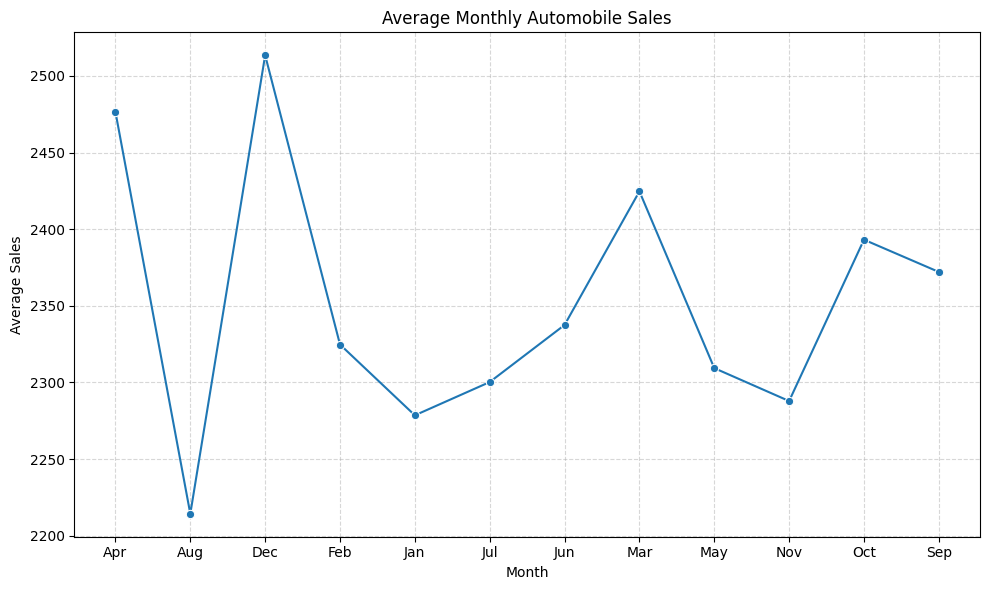

In [61]:
monthly_sales = data.groupby("Month")["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x="Month", y="Automobile_Sales", marker="o")
plt.title("Average Monthly Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

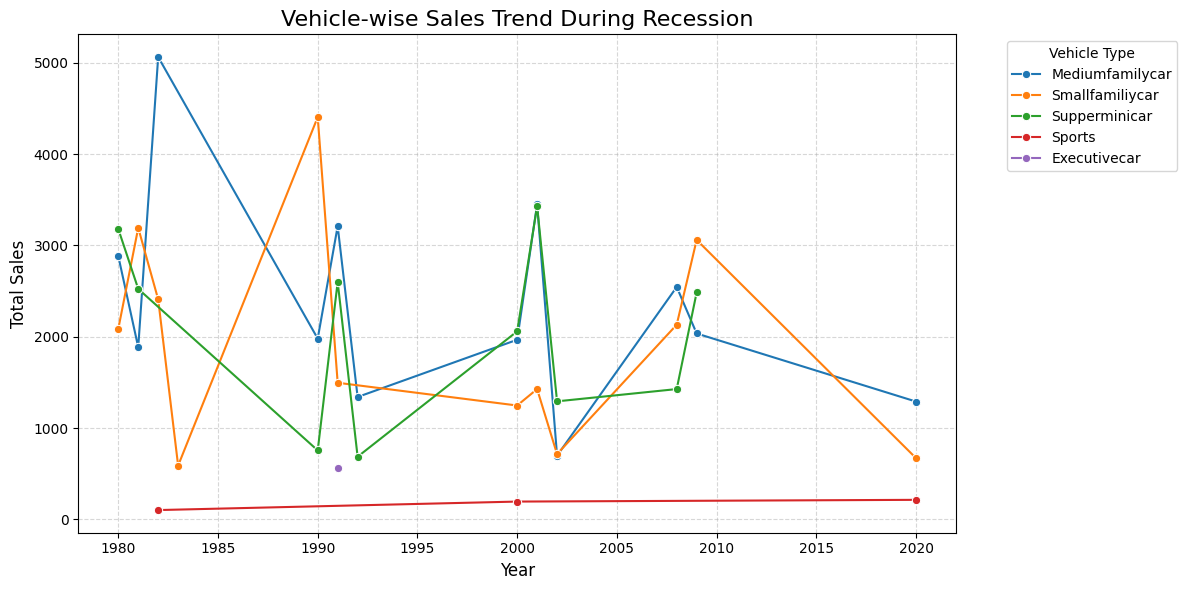

In [63]:
# Filter recession data
df_rec = data[data["Recession"] == 1]

# Group by year and vehicle type, using sum
df_Mline = df_rec.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Mline, x="Year", y="Automobile_Sales", hue="Vehicle_Type", marker="o")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Vehicle-wise Sales Trend During Recession', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

During recession period, the sales for Sports type vehicles declined because of the high cost of the vehicle, while sales of the superminicar and smallfamilycar increased.

Now, we will compare the variations in GDP during recession and non-recession period

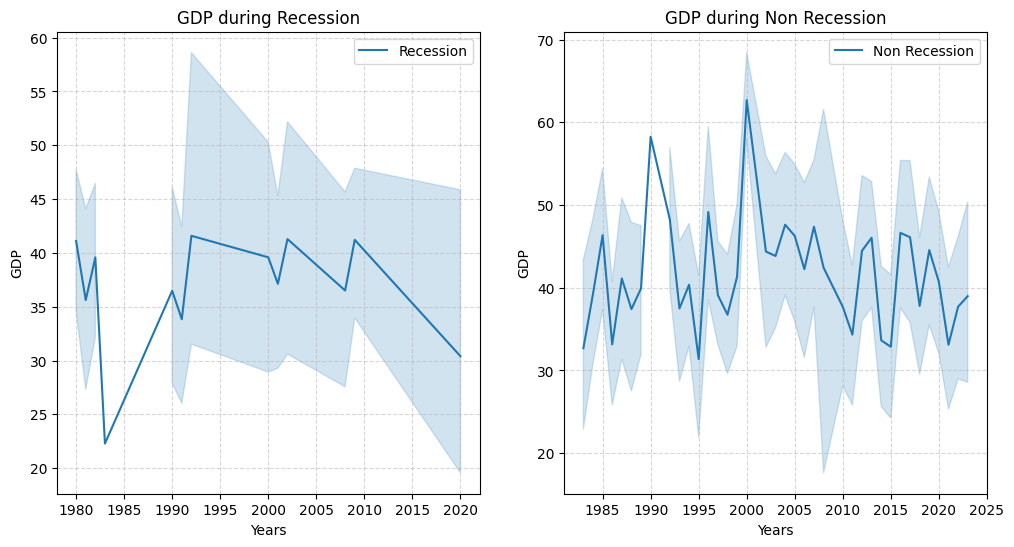

In [65]:
df_rec = data[data["Recession"] == 1]
df_non_rec = data[data["Recession"] == 0]

fig = plt.figure(figsize = (12, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.lineplot(x = "Year", y = "GDP", data = df_rec, label = "Recession", ax = ax0)
ax0.set_xlabel("Years")
ax0.set_ylabel("GDP")
ax0.set_title("GDP during Recession")
ax0.grid(True, linestyle='--', alpha=0.5)

sns.lineplot(x = "Year", y = "GDP", data = df_non_rec, label = "Non Recession", ax = ax1)
ax1.set_xlabel("Years")
ax1.set_ylabel("GDP")
ax1.set_title("GDP during Non Recession")
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.

Pie chart to display the portion of advertising expenditure of ABCAutomotives during recession and non-recession periods.

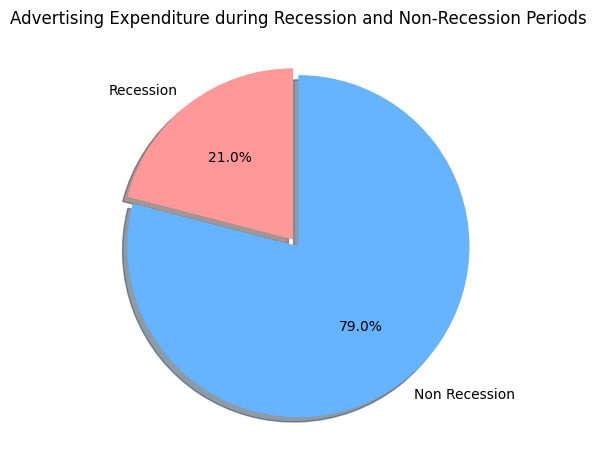

In [67]:
colors = ["#ff9999", "#66b3ff"]
explode = (0.05, 0)  # explode first slice slightly

plt.pie(size, labels=labels, autopct="%0.1f%%", startangle=90, colors=colors, shadow=True, explode=explode)
plt.title("Advertising Expenditure during Recession and Non-Recession Periods")
plt.tight_layout()
plt.show()

<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

In [26]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print("File Downloaded sucessfully")
else:
    print("Failed to download file.")

File Downloaded sucessfully


In [27]:
recession_data = data[data["Recession"] == 1]
sales_by_city = recession_data.groupby("City")["Automobile_Sales"].sum().reset_index()
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
choropleth = folium.Choropleth(
    geo_data = "us-states.json",
    data = sales_by_city,
    columns = ["City", "Automobile_Sales"],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
    ).add_to(map1)


choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
    )

map1

## Correlation with Economic Indicator

In [29]:
data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


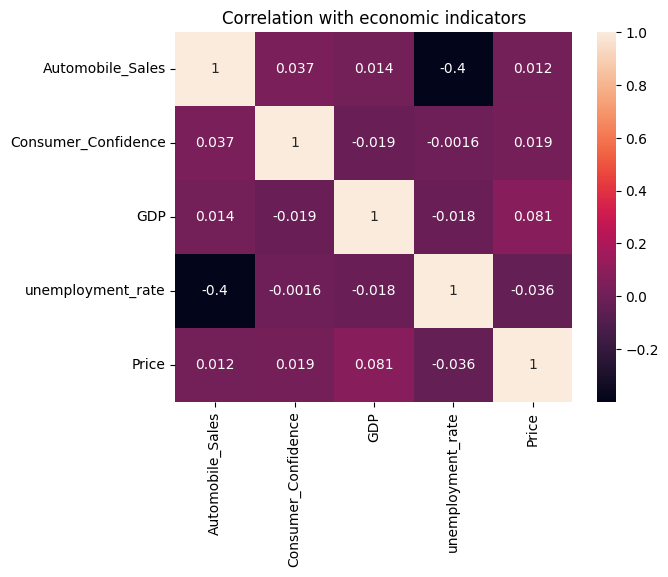

In [30]:
economic_ind = data[["Automobile_Sales", "Consumer_Confidence", "GDP", "unemployment_rate", "Price"]].corr()
sns.heatmap(economic_ind, annot = True)
plt.title("Correlation with economic indicators")
plt.show()

Among the analyzed economic indicators, unemployment rate shows a moderate negative relationship with automobile sales (-0.4), suggesting that higher unemployment tends to reduce vehicle purchases.

## ✅ Business Insights & Recommendations

After analyzing historical automobile sales data, we draw the following key insights:

- **Impact of Recession:** Automobile sales decrease significantly during recession periods, with luxury and sports vehicles facing the steepest declines. In contrast, more affordable vehicle types (e.g., supermini and small family cars) show relatively stable demand.
- **Vehicle Type Strategy:** The company should focus on promoting affordable vehicle types during economic downturns, supported by flexible financing options and value-based messaging.
- **Advertising Spend:** Advertising expenditure is higher during non-recession periods, which aligns with higher consumer confidence and spending. During recessions, instead of reducing advertising drastically, the company could strategically reallocate spend toward digital or targeted marketing to sustain brand visibility.
- **GDP & Unemployment Effects:** Weak correlation with GDP, but moderate negative correlation with unemployment rate (-0.4) indicates that higher unemployment significantly impacts vehicle purchase decisions. Monitoring unemployment trends can help guide inventory and pricing strategies.

### Recommendations

- Prioritize production and promotion of lower-cost vehicle segments during recessions.
- Maintain consistent brand presence with optimized advertising spend rather than severe cuts.
- Use unemployment rate as an early warning signal for adjusting sales strategies and marketing campaigns.
- Prepare targeted offers or flexible payment plans in anticipation of downturns.

---

## 📝 Executive Summary

This analysis investigates historical automobile sales data to understand how sales are influenced by macroeconomic factors and recession periods.

### Key Findings

- Sales decline notably during recessions, especially for luxury vehicle types.
- Affordable vehicles (supermini and small family cars) show resilience, suggesting a shift in consumer preference during economic uncertainty.
- Advertising expenditure is higher during strong economic periods; however, strategic investment in brand presence during recessions could help mitigate sales drops.
- Unemployment rate is a useful leading indicator for sales adjustments.

### Business Impact

By tailoring product focus and marketing strategies based on economic indicators, the company can reduce the impact of downturns, maintain market share, and improve long-term profitability.

---

#  References
 
- Historical Automobile Sales dataset. IBM Developer Skills Network.  
- [Link to dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv)

- IBM Data Science Professional Certificate: [IBM on Coursera](https://www.coursera.org/professional-certificates/ibm-data-science)

---

✅ This project demonstrates an end-to-end analysis of automobile sales data, including data preprocessing, trend analysis, recession impact evaluation, and business insights. Visualizations were created using open-source Python libraries to support data-driven decision-making.
